In [3]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 12.1 MB/s eta 0:00:00


In [4]:
!pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.0/908.0 KB 11.4 MB/s eta 0:00:00


In [17]:
!pip install vartests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.2/916.2 KB 15.2 MB/s eta 0:00:00


In [5]:
import yfinance as yf
import numpy as np
import pandas as pd
#import pandas_datareader.data as web
from datetime import datetime, timedelta 
import matplotlib.pyplot as plt
from scipy.stats import norm
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [6]:
tickers = ['AAPL']
start = datetime(2015,1,1)
end = datetime.now()

df = yf.download(tickers, start, end)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [7]:
returns = df.pct_change().dropna()

In [16]:
am = arch_model(returns*100, vol='Garch', mean="Zero", p=2, q=0)
res = am.fit(disp='off', last_obs="2021-12-31")

forecasts = res.forecast(start='2022-1-1', reindex=False)
cond_mean = forecasts.mean["2022":]
cond_var = forecasts.variance['2022':]
q = am.distribution.ppf([0.01, 0.05])
print(q)

[-2.32634787 -1.64485363]


In [14]:
value_at_risk = -cond_mean.values - np.sqrt(cond_var).values*q[None,:]
value_at_risk = pd.DataFrame(value_at_risk, columns=['1%','5%'],index=cond_var.index)
value_at_risk

,1%,5%
Date,,
2022-01-03,3.596736,2.487549
2022-01-04,3.570744,2.469172
2022-01-05,4.093835,2.839025
2022-01-06,4.095665,2.840319
2022-01-07,3.793358,2.626572
...,...,...
2023-03-13,3.578481,2.474642
2023-03-14,3.492930,2.414153
2023-03-15,3.269309,2.256040


In [ ]:
rolling_predictions = []
num_days = 10

for i in range(num_days):
  train = returns[:-(num_days-i)]
  model = arch_model(100*train, mean="Zero", p=2, q=0)
  model_fit = model.fit(disp = 'off')
  pred = model_fit.forecast(horizon=1)
  rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

below is for referenc only

In [ ]:
#portfolio and weight
tickers = ['AAPL','C','DIS','F','MSFT','MS','GME','TSLA','AMZN']
weights = np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])
total_capital = 10000
ticker = tickers[0]

In [ ]:
start = datetime(2018,3,21)
end = datetime.now()

df = yf.download(tickers, start, end)['Adj Close']

[*********************100%***********************]  9 of 9 completed


In [ ]:
returns = df.pct_change().dropna()
returns

,AAPL,AMZN,C,DIS,F,GME,MS,MSFT,TSLA
Date,,,,,,,,,
2018-03-22,-0.014130,-0.023352,-0.041053,-0.011982,-0.031531,-0.013552,-0.043250,-0.029087,-0.023473
2018-03-23,-0.023156,-0.031950,-0.034277,-0.020477,-0.017674,-0.023861,-0.047035,-0.029068,-0.024458
2018-03-26,0.047472,0.040319,0.027688,0.021413,0.025568,0.040000,0.042827,0.075705,0.008755
2018-03-27,-0.025641,-0.037799,-0.021496,-0.012817,0.000000,-0.011396,-0.021179,-0.045959,-0.082188
2018-03-28,-0.011049,-0.043840,-0.000293,-0.008253,0.002770,0.019452,-0.004516,-0.000894,-0.076653
...,...,...,...,...,...,...,...,...,...
2023-03-13,0.013266,0.018737,-0.074472,-0.010367,-0.005785,-0.028986,-0.022876,0.021441,0.005996
2023-03-14,0.014089,0.026507,0.059455,0.008207,-0.008313,0.009552,0.022503,0.027056,0.050321
2023-03-15,0.002621,0.013912,-0.054430,-0.002785,-0.018441,-0.056771,-0.050906,0.017830,-0.015333


In [ ]:
plt.figure(figsize=(80,40))
plt.subplot(9,1,1)
plt.plot(returns[tickers[0]])
plt.subplot(9,1,2)
plt.plot(returns[tickers[1]])
plt.subplot(9,1,3)
plt.plot(returns[tickers[2]])
plt.subplot(9,1,4)
plt.plot(returns[tickers[3]])
plt.subplot(9,1,5)
plt.plot(returns[tickers[4]])
plt.subplot(9,1,6)
plt.plot(returns[tickers[5]])
plt.subplot(9,1,7)
plt.plot(returns[tickers[6]])
plt.subplot(9,1,8)
plt.plot(returns[tickers[7]])
plt.subplot(9,1,9)
plt.plot(returns[tickers[8]])

plt.ylabel("Pct Return", fontsize =16)
#plt.title("Returns", fontsize =20)

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

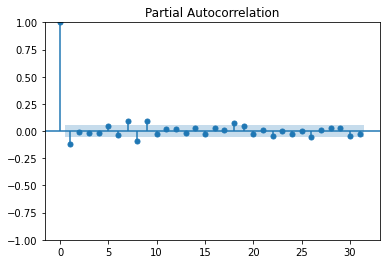

In [ ]:
plot_pacf(returns)
plt.show

In [ ]:
for i in range(len(tickers)):
  plot_pacf(returns[tickers[i]])
  plt.show

In [ ]:
#fit GARCH(3,3)

model = arch_model(100*returns[tickers[1]],  mean='Zero', p=3, q=3)
model_fit = model.fit()

Iteration:      1,   Func. Count:      9,   Neg. LLF: 6019.307824776082
Iteration:      2,   Func. Count:     23,   Neg. LLF: 5063.727903381823
Iteration:      3,   Func. Count:     32,   Neg. LLF: 4855.04316903697
Iteration:      4,   Func. Count:     41,   Neg. LLF: 4610.549175294738
Iteration:      5,   Func. Count:     50,   Neg. LLF: 4360.990582601151
Iteration:      6,   Func. Count:     60,   Neg. LLF: 4099.634724802365
Iteration:      7,   Func. Count:     69,   Neg. LLF: 4080.1486972923626
Iteration:      8,   Func. Count:     77,   Neg. LLF: 4084.7400032997502
Iteration:      9,   Func. Count:     86,   Neg. LLF: 4081.0291925898055
Iteration:     10,   Func. Count:     95,   Neg. LLF: 4079.6127728660604
Iteration:     11,   Func. Count:    103,   Neg. LLF: 4079.6054148807975
Iteration:     12,   Func. Count:    111,   Neg. LLF: 4079.598296266833
Iteration:     13,   Func. Count:    119,   Neg. LLF: 4079.596815961395
Iteration:     14,   Func. Count:    127,   Neg. LLF: 4079.5

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                      C   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4079.60
Distribution:                  Normal   AIC:                           8173.19
Method:            Maximum Likelihood   BIC:                           8212.62
                                        No. Observations:                 2065
Date:                Mon, Mar 20 2023   Df Residuals:                     2065
Time:                        04:46:48   Df Model:                            0
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.2433      0.906      0.268      0.788   [ -1.533,  2.020]
alpha[1]       0.2110  7.064e-02      2.988  2.812e-03 [7.259e-02,  0.349]
alpha[2]       0.0130      0.466  2.798e-02      0.978   [ -0.901,  0.927]
alpha[3]       0.0000      0.248      0.000      1.000   [ -0.487,  0.487]
beta[1]        0.4242      2.078      0.204      0.838   [ -3.649,  4.498]
beta[2]    5.5070e-14      0.424  1.298e-13      1.000   [ -0.832,  0.832]
beta[3]        0.2964      0.837      0.354      0.723   [ -1.345,  1.938]
==========================================================================

Covariance estimator: robust
"""

In [ ]:
model = arch_model(100*returns[tickers[1]], mean='Zero', p=2, q=0)
model_fit = model.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 5700.579196403038
Iteration:      2,   Func. Count:     12,   Neg. LLF: 11327.783540397177
Iteration:      3,   Func. Count:     17,   Neg. LLF: 3650817.8749129362
Iteration:      4,   Func. Count:     22,   Neg. LLF: 14771.186213097575
Iteration:      5,   Func. Count:     27,   Neg. LLF: 4305.178447456136
Iteration:      6,   Func. Count:     33,   Neg. LLF: 4162.053429224838
Iteration:      7,   Func. Count:     37,   Neg. LLF: 4160.498015560226
Iteration:      8,   Func. Count:     41,   Neg. LLF: 4160.134908344113
Iteration:      9,   Func. Count:     45,   Neg. LLF: 4160.118735023201
Iteration:     10,   Func. Count:     49,   Neg. LLF: 4160.118595687631
Iteration:     11,   Func. Count:     53,   Neg. LLF: 4160.118592907294
Iteration:     12,   Func. Count:     56,   Neg. LLF: 4160.118592906985
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4160.118592907294
            Iterations: 1

In [ ]:
model_fit.summary()

In [ ]:
model = arch_model(100*returns,  mean='Zero', p=2, q=0)
model_fit = model.fit()

In [ ]:
model_fit.summary

<bound method ARCHModelResult.summary of                         Zero Mean - ARCH Model Results                        
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                       ARCH   Log-Likelihood:               -2652.79
Distribution:                  Normal   AIC:                           5311.57
Method:            Maximum Likelihood   BIC:                           5326.98
                                        No. Observations:                 1256
Date:                Mon, Mar 20 2023   Df Residuals:                     1256
Time:                        06:19:24   Df Model:                            0
                             Volatility Model                             
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          2.7978  

In [ ]:
rolling_predictions = []
num_years = 1
test_size = 365* num_years
stock = returns[tickers[0]] #tickers[0] for portfilio

for i in range(test_size):
  train = stock[:-(test_size-i)]
  model = arch_model(100*train, mean="Zero", p=2, q=0)
  model_fit = model.fit(disp = 'off')
  pred = model_fit.forecast(horizon=1)
  rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

/usr/local/lib/python3.9/dist-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

In [ ]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365*num_years:])
rolling_predictions

Date
2021-10-05    1.891283
2021-10-06    2.164161
2021-10-07    1.790043
2021-10-08    1.663009
2021-10-11    1.669618
                ...   
2023-03-13    1.892900
2023-03-14    1.868801
2023-03-15    1.869058
2023-03-16    1.795508
2023-03-17    1.840183
Length: 365, dtype: float64

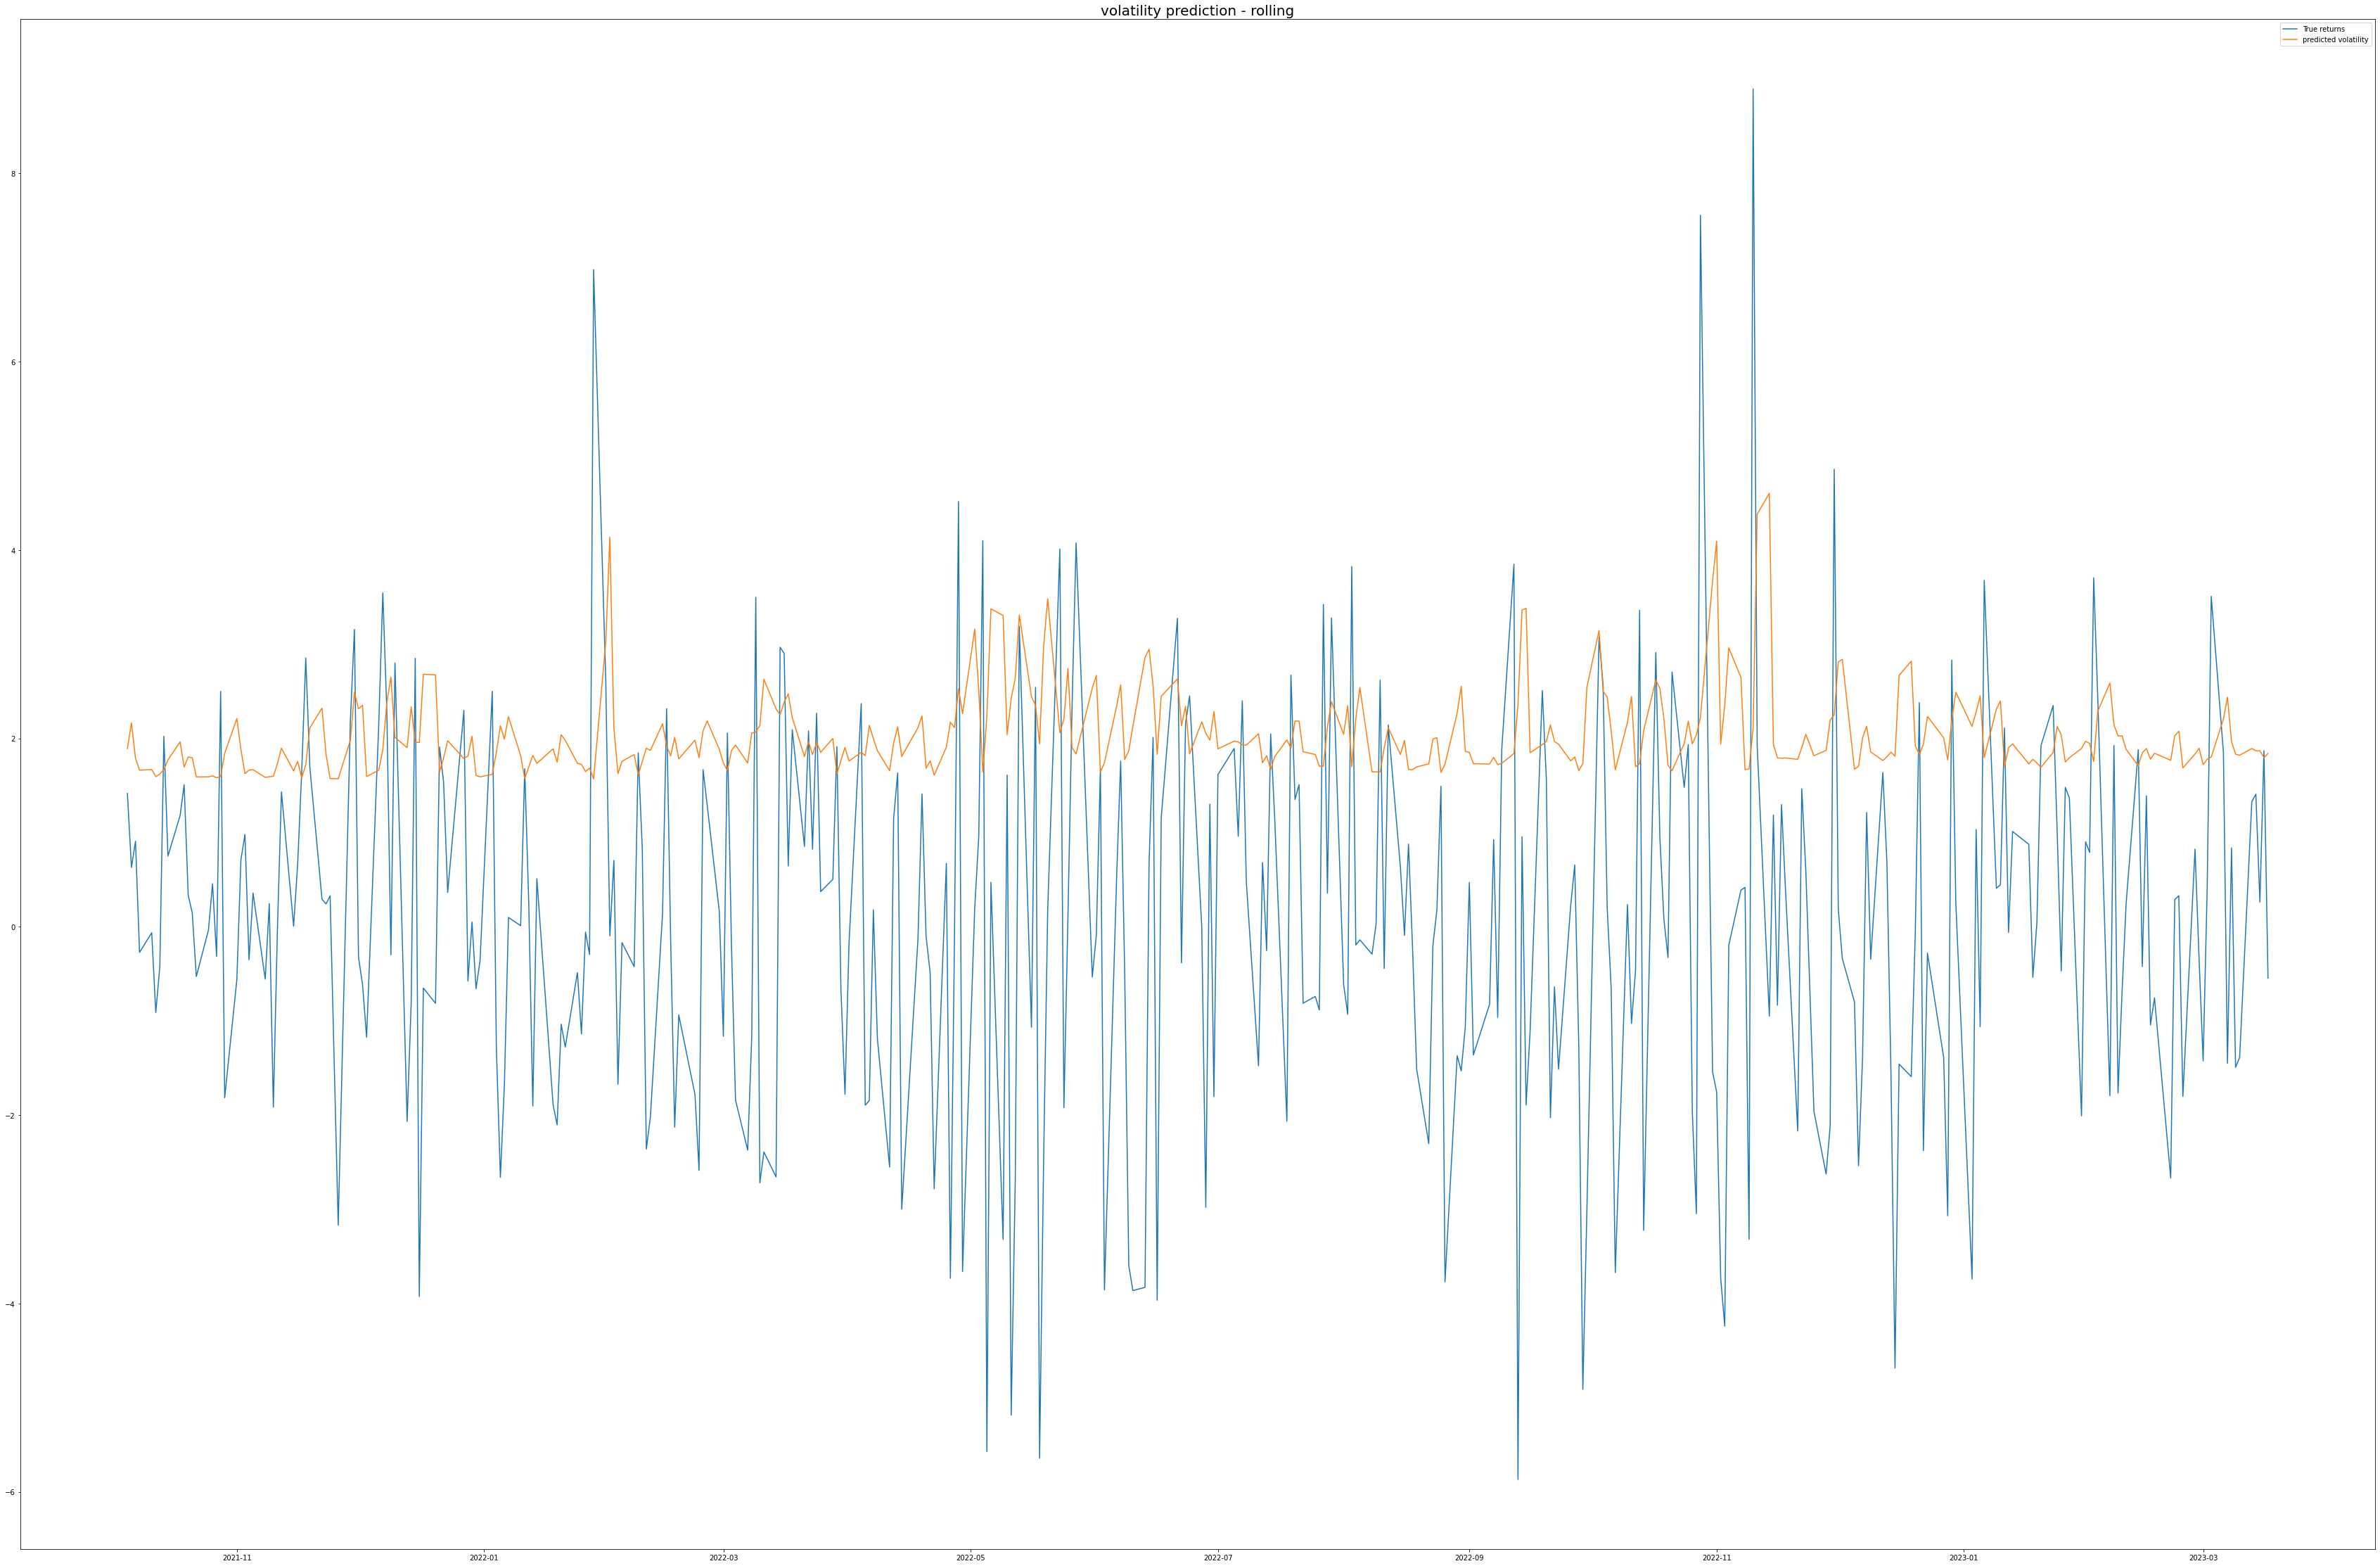

In [ ]:
plt.figure(figsize=(60,40))
true, = plt.plot(100*stock[-365*num_years:])
preds = plt.plot(rolling_predictions)
plt.title("volatility prediction - rolling", fontsize= 20)
plt.legend(["True returns", "predicted volatility"],fontsize= 10)


set up VAR model

In [ ]:
cov_matrix = returns.cov()
cov_matrix

,AAPL,AMZN,C,DIS,F,GME,MS,MSFT,TSLA
AAPL,0.000353,0.000231,0.000185,0.000152,0.000160,0.000220,0.000197,0.000236,0.000292
AMZN,0.000231,0.000445,0.000147,0.000149,0.000137,0.000190,0.000162,0.000251,0.000303
C,0.000185,0.000147,0.000466,0.000223,0.000286,0.000287,0.000369,0.000183,0.000225
DIS,0.000152,0.000149,0.000223,0.000316,0.000204,0.000168,0.000211,0.000154,0.000194
F,0.000160,0.000137,0.000286,0.000204,0.000516,0.000330,0.000273,0.000155,0.000261
GME,0.000220,0.000190,0.000287,0.000168,0.000330,0.005313,0.000213,0.000166,0.000421
MS,0.000197,0.000162,0.000369,0.000211,0.000273,0.000213,0.000418,0.000194,0.000224
MSFT,0.000236,0.000251,0.000183,0.000154,0.000155,0.000166,0.000194,0.000316,0.000269
TSLA,0.000292,0.000303,0.000225,0.000194,0.000261,0.000421,0.000224,0.000269,0.001296


In [ ]:
avg_returns = returns.mean()
count = returns.count()[0]
weighted_avg_returns = avg_returns@weights
weighted_std = np.sqrt(weights.T@cov_matrix@weights)

print(avg_returns)
print(weighted_avg_returns)
print(weighted_std)

AAPL    0.001286
AMZN    0.000440
C       0.000033
DIS     0.000165
F       0.000548
GME     0.004905
MS      0.000672
MSFT    0.001121
TSLA    0.002589
dtype: float64
0.001175796246625892
0.015964317084252423


In [ ]:
avg_returns = returns.mean()
print(avg_returns)
count = returns.count()
print(count)
weighted_std = np.sqrt(rolling_predictions[0])
print(weighted_std)

0.001285765034910035
1256
1.4721257719637468


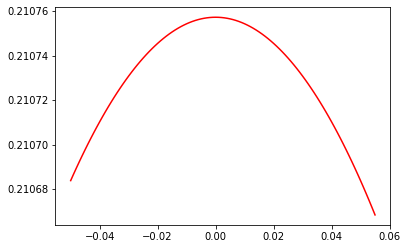

In [ ]:
x = np.arange(-0.05, 0.055, 0.001)
norm_dist = norm.pdf(x, weighted_avg_returns, weighted_std)

plt.plot(x, norm_dist, color = 'r')
plt.show()

In [ ]:
confidence_level = 0.05
num_days = 2

VaR = norm.ppf(confidence_level, weighted_avg_returns, weighted_std)*np.sqrt(num_days)
VaR

-5.039863062709206

In [ ]:
lower_bound = weighted_avg_returns - 2*weighted_std/np.sqrt(count)
upper_bound = weighted_avg_returns + 2*weighted_std/np.sqrt(count)

In [ ]:
print(lower_bound)
print(upper_bound)

-0.12136934814432647
0.12322983549682746


In [ ]:
# stock predict price =  